<a href="https://colab.research.google.com/github/bluebiird/PRODIGY_ML_01/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [ ]:
d_train = pd.read_csv('/content/train.csv')
d_test = pd.read_csv('/content/test.csv')

In [ ]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
d_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [ ]:
d_train.shape

(1460, 81)

In [ ]:
for col in d_train:
  a = d_train[col].dtype
  if a == object:
    d_train[col].fillna(d_train[col].mode()[0], inplace = True)
  else:
      d_train[col].fillna(d_train[col].median(), inplace = True)

In [ ]:
d_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
for col in d_test:
  a = d_test[col].dtype
  if a == object:
    d_test[col].fillna(d_test[col].mode()[0], inplace = True)
  else:
    d_test[col].fillna(d_test[col].median(), inplace = True)

In [ ]:
d_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one_hot_encoded_training_predictors = pd.get_dummies(d_train)
one_hot_encoded_test_predictors = pd.get_dummies(d_test)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors, join = 'left', axis=1)
final_train.shape
final_test.shape

(1459, 290)

Separting Features and Target

In [ ]:
from sklearn.model_selection import train_test_split
x = final_train.drop(columns=['SalePrice'])
y = final_train.SalePrice
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

Training the Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

Accuracy of the model

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [ ]:
predictor = regressor.predict(x_test)

In [ ]:
print(r2_score(y_test, predictor))

0.8592141237628643


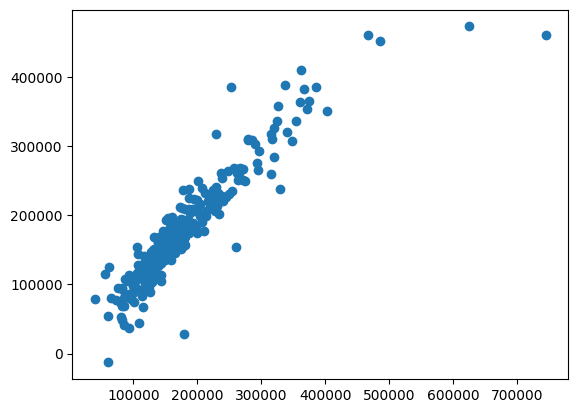

In [ ]:
plt.scatter(y_test, predictor)